## Deep Learning Model

C:\Users\bekib\AppData\Local\Temp\ipykernel_54720\1880438380.py:15: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/train.csv')


Sales    1
dtype: int64
              Sales
count  9.410000e+02
mean   1.064028e+04
std    4.478749e+06
min   -1.120407e+07
25%   -1.815380e+06
50%   -2.939860e+05
75%    3.447760e+05
max    1.540952e+07


c:\Users\bekib\Desktop\10ACADAMY\WEEK-FOUR\week-4\.week-4\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: nan - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: nan - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: nan - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: nan - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: nan - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan - learning_rate: 2.0000e-04
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: nan - learning_rate: 2.0000e-04
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: nan - learning_rate: 2.0000e-04
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: nan - learning_rate: 2.0000e-04
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: nan - learning_rate: 2.0000e-04
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: nan - learning_rate: 4.0000e-05
Epoch 12/50
23/23

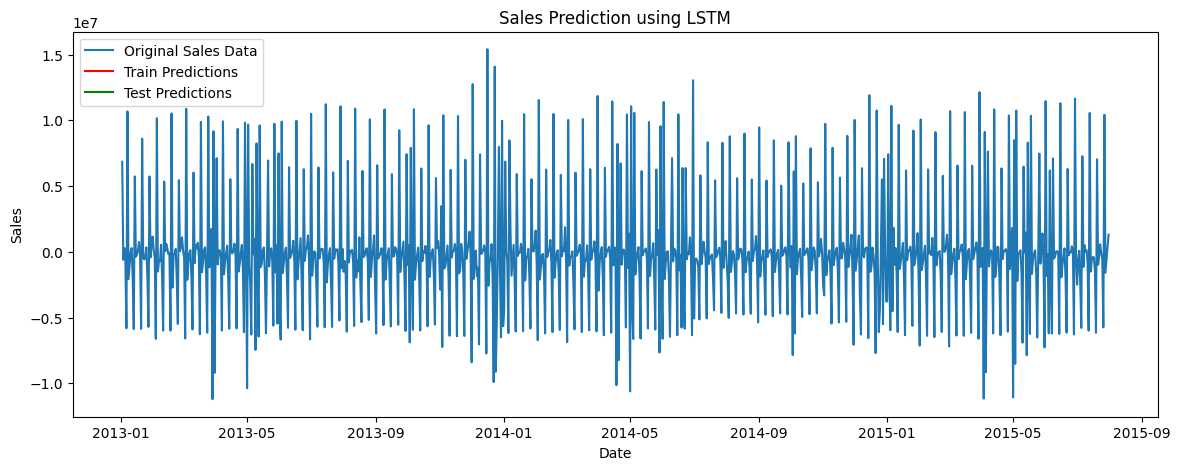

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

# Set seed for reproducibility
tf.random.set_seed(42)

# Load the dataset
df = pd.read_csv('../data/train.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Isolate time series data
sales_data = df[['Sales']].resample('D').sum()

# Apply differencing and drop NaN
sales_data['Sales'] = sales_data['Sales'].diff().dropna()

# Check for NaN and extreme values
print(sales_data.isnull().sum())  # Check for missing values
print(sales_data.describe())  # Check for large, small, or NaN values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(sales_data.values)

# Transform into supervised learning
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step
time_step = 30
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model with batch normalization and dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile with Adam optimizer and gradient clipping
optimizer = Adam(learning_rate=0.001, clipvalue=1.0)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Reduce learning rate if needed
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[reduce_lr])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Evaluate the model
plt.figure(figsize=(14,5))
plt.plot(sales_data.index, sales_data['Sales'], label='Original Sales Data')
train_predict_index = sales_data.index[time_step:train_size + time_step]
plt.plot(train_predict_index, train_predict, label='Train Predictions', color='red')
test_predict_index = sales_data.index[train_size + time_step:]
plt.plot(test_predict_index, test_predict, label='Test Predictions', color='green')
plt.title('Sales Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [3]:
path = pd.read_csv('../data/test.csv')
model.predict(X_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      